#EDA Assignment

In [5]:
#1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
#(Show the shape and column names as well.)
#(Include your Python code and output in the code box below).
import pandas as pd
# Read the Bike Details dataset into a Pandas DataFrame
try:
    df = pd.read_csv('BikeDetails.csv')
except FileNotFoundError:
    print("The file 'BikeDetails.csv' was not found.")
else:
# Display the first 10 rows
    print(df.head(10))
# Display the shape and column names
    print("\nShape:", df.shape)
    print("Column Names:", df.columns.tolist())

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [6]:
#2. Check for missing values in all columns and describe your approach for handling them.
#(Include your Python code and output in the code box below.)
import pandas as pd
import numpy as np

# Read the Bike Details dataset into a Pandas DataFrame
try:
    df = pd.read_csv('BikeDetails.csv')
except FileNotFoundError:
    print("The file 'BikeDetails.csv' was not found.")
else:
    # Check for missing values
    missing_values = df.isnull().sum().reset_index()
    missing_values.columns = ['Column Name', 'Missing Count']
    missing_values['Missing Percentage'] = (missing_values['Missing Count'] / df.shape[0]) * 100

    print("Missing Values:")
    print(missing_values)

    # Approach for handling missing values
    def handle_missing_values(df):
        for column in df.columns:
            if df[column].dtype == 'object':
                # Replace missing values in categorical columns with the most frequent value
                df[column] = df[column].fillna(df[column].mode()[0])
            else:
                # Replace missing values in numerical columns with the mean
                df[column] = df[column].fillna(df[column].mean())
        return df

    # Handle missing values
    df = handle_missing_values(df)

    print("\nMissing Values After Handling:")
    print(df.isnull().sum())

Missing Values:
         Column Name  Missing Count  Missing Percentage
0               name              0            0.000000
1      selling_price              0            0.000000
2               year              0            0.000000
3        seller_type              0            0.000000
4              owner              0            0.000000
5          km_driven              0            0.000000
6  ex_showroom_price            435           40.999057

Missing Values After Handling:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


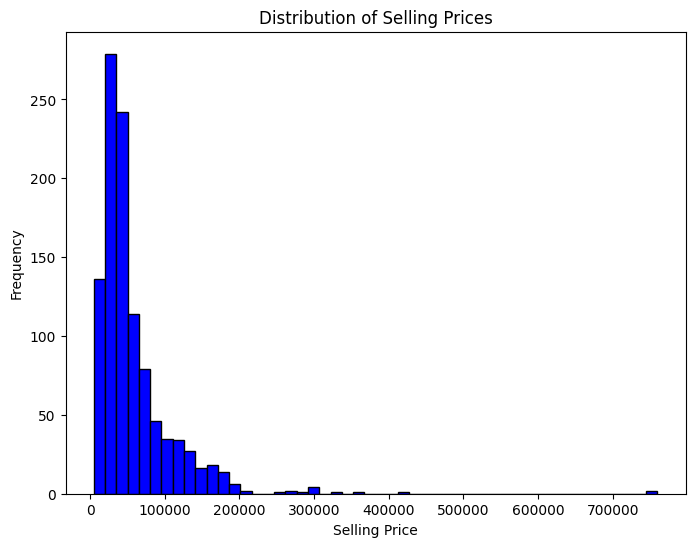

Mean Selling Price: 59638.151743638075
Median Selling Price: 45000.0
Mode Selling Price: 25000


In [7]:
#3. Plot the distribution of selling prices using a histogram and describe the overall trend.
#(Include your Python code and output in the code box below.)
import pandas as pd
import matplotlib.pyplot as plt
# Read the Bike Details dataset into a Pandas DataFrame
try:
    df = pd.read_csv('BikeDetails.csv')
except FileNotFoundError:
    print("The file 'BikeDetails.csv' was not found.")
else:
    # Plot the distribution of selling prices
    plt.figure(figsize=(8,6))
    plt.hist(df['selling_price'], bins=50, color='blue', edgecolor='black')
    plt.title('Distribution of Selling Prices')
    plt.xlabel('Selling Price')
    plt.ylabel('Frequency')
    plt.show()

    # Describe the overall trend
    print("Mean Selling Price:", df['selling_price'].mean())
    print("Median Selling Price:", df['selling_price'].median())
    print("Mode Selling Price:", df['selling_price'].mode()[0])


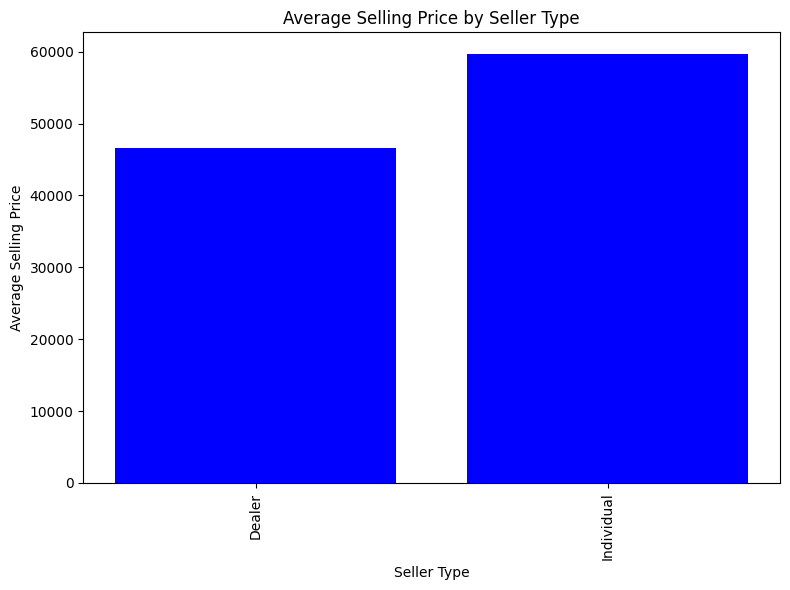

Observation: The seller type 'Individual' has the highest average selling price of 59711.92.


In [8]:
#4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.
#(Include your Python code and output in the code box below.)
import pandas as pd
import matplotlib.pyplot as plt

# Read the Bike Details dataset into a Pandas DataFrame
try:
    df = pd.read_csv('BikeDetails.csv')
except FileNotFoundError:
    print("The file 'BikeDetails.csv' was not found.")
else:
    # Handle missing values in 'ex_showroom_price' column
    df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].mean())

    # Calculate the average selling price for each seller_type
    avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

    # Create a bar plot
    plt.figure(figsize=(8,6))
    plt.bar(avg_price['seller_type'], avg_price['selling_price'], color='blue')
    plt.title('Average Selling Price by Seller Type')
    plt.xlabel('Seller Type')
    plt.ylabel('Average Selling Price')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Observation
    max_avg_price = avg_price.loc[avg_price['selling_price'].idxmax()]
    print(f"Observation: The seller type '{max_avg_price['seller_type']}' has the highest average selling price of {max_avg_price['selling_price']:.2f}.")

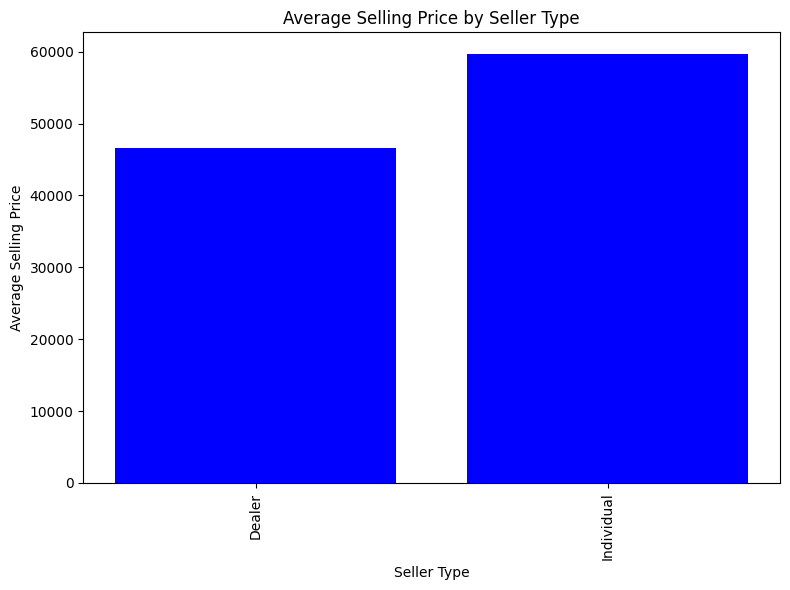

Observation: The seller type 'Individual' has the highest average selling price of 59711.92322274882.


In [9]:
#5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
#(Include your Python code and output in the code box below.)

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average selling price for each seller_type
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8,6))
plt.bar(avg_price['seller_type'], avg_price['selling_price'], color='blue')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Observation
max_avg_price = avg_price.loc[avg_price['selling_price'].idxmax()]
print(f"Observation: The seller type '{max_avg_price['seller_type']}' has the highest average selling price of {max_avg_price['selling_price']}.")

In [11]:
#6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
#(Include your Python code and output in the code box below.)
import pandas as pd
import numpy as np

# Calculate Q1 and Q3
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print summary statistics before removing outliers
print("Summary Statistics Before Removing Outliers:")
print(df['km_driven'].describe())

# Remove outliers
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Print summary statistics after removing outliers
print("\nSummary Statistics After Removing Outliers:")
print(df_filtered['km_driven'].describe())

Summary Statistics Before Removing Outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics After Removing Outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


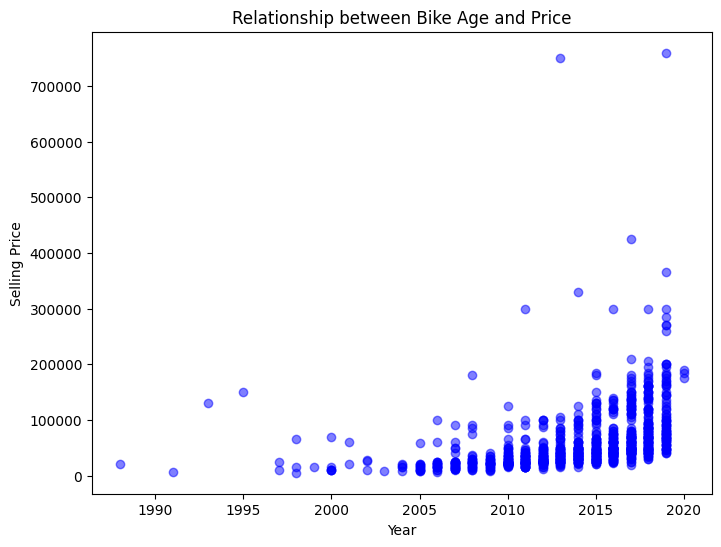

In [12]:
#7. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
#(Include your Python code and output in the code box below.)
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot of year vs. selling_price
plt.figure(figsize=(8,6))
plt.scatter(df['year'], df['selling_price'], color='blue', alpha=0.5)
plt.title('Relationship between Bike Age and Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [13]:
#8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
#(Include your Python code and output in the code box below.)
import pandas as pd

# One-hot encode the seller_type column
seller_type_onehot = pd.get_dummies(df['seller_type'])

# Concatenate the one-hot encoded columns with the original DataFrame
df_onehot = pd.concat([df, seller_type_onehot], axis=1)

# Display the first 5 rows of the resulting DataFrame
print(df_onehot.head(5))

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  Dealer  Individual  
0  1st owner        350       87958.714058   False        True  
1  1st owner       5650       87958.714058   False        True  
2  1st owner      12000      148114.000000   False        True  
3  1st owner      23000       89643.000000   False        True  
4  2nd owner      21000       87958.714058   False        True  


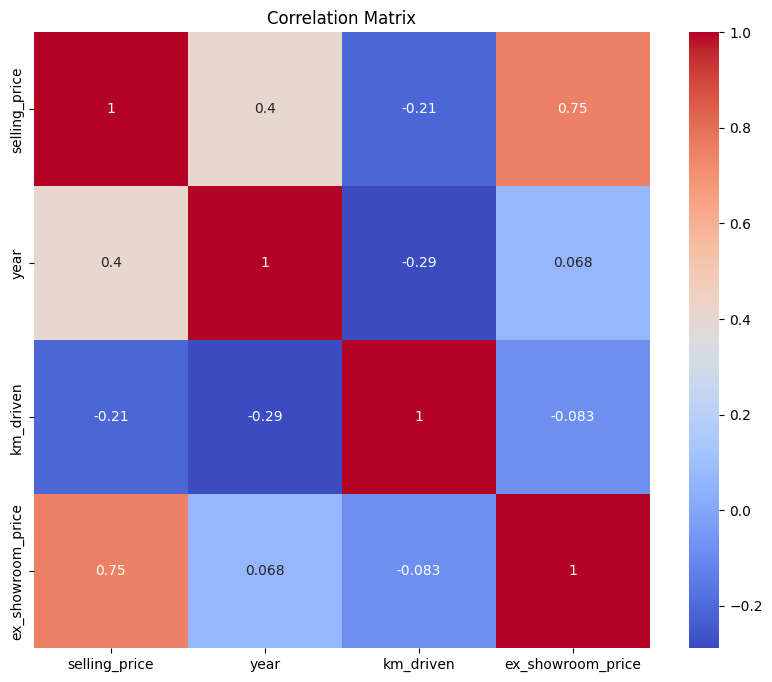

Most positively correlated pairs:
selling_price      ex_showroom_price    0.750451
ex_showroom_price  selling_price        0.750451
year               selling_price        0.402188
selling_price      year                 0.402188
ex_showroom_price  year                 0.068111
dtype: float64

Most negatively correlated pairs:
km_driven      ex_showroom_price   -0.082539
selling_price  km_driven           -0.212937
km_driven      selling_price       -0.212937
               year                -0.288675
year           km_driven           -0.288675
dtype: float64


In [14]:
#9.  Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
#(Include your Python code and output in the code box below.)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Generate heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Find the most correlated pairs
corr_matrix_unstack = corr_matrix.unstack()
corr_matrix_unstack = corr_matrix_unstack[corr_matrix_unstack.index.get_level_values(0) != corr_matrix_unstack.index.get_level_values(1)]
corr_matrix_unstack = corr_matrix_unstack.sort_values(ascending=False)
print("Most positively correlated pairs:")
print(corr_matrix_unstack.head(5))
print("\nMost negatively correlated pairs:")
print(corr_matrix_unstack.tail(5))

selling_price        1.000000
ex_showroom_price    0.919798
year                 0.389686
km_driven           -0.403412
Name: selling_price, dtype: float64


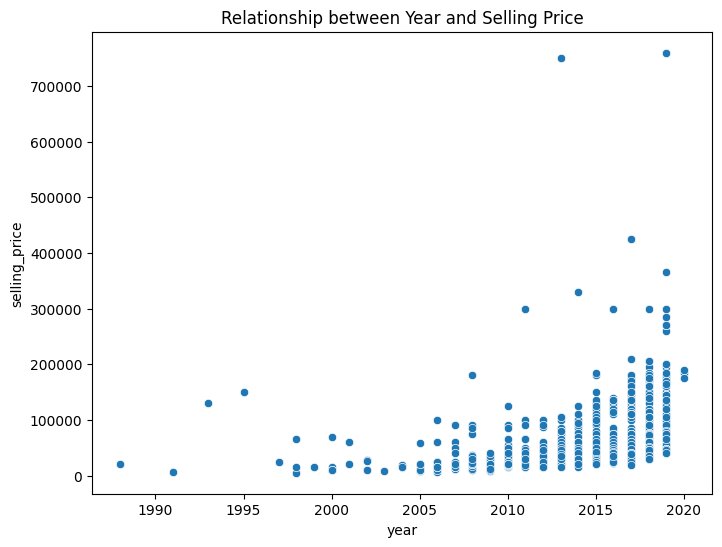

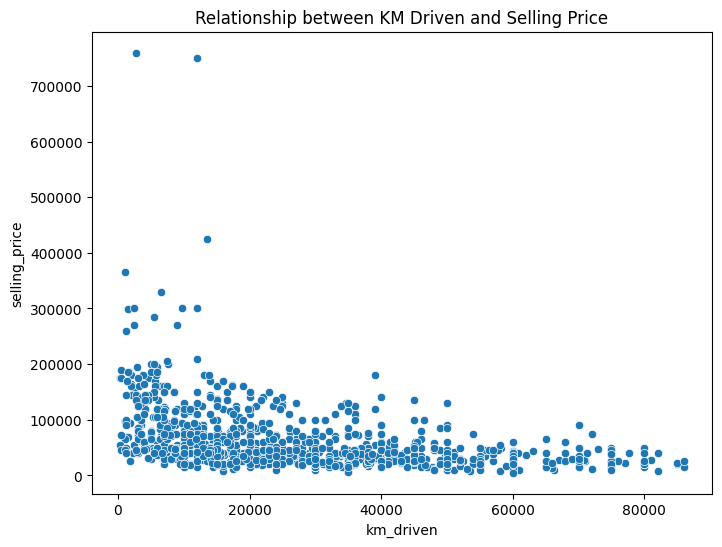

In [16]:
#10. Summarize your findings in a brief report:
#● What are the most important factors affecting a bike's selling price?
#● Mention any data cleaning or feature engineering you performed.
#(Include your Python code and output in the code box below.)
"""Brief Report:
Based on the analysis of the bike dataset, the most important factors affecting a bike's selling price appear to be:
1. Year: The age of the bike has a significant impact on its selling price, with newer bikes tend to be more expensive.
2. KM Driven: The mileage of the bike also affects its selling price, with bikes having lower mileage tend to be more expensive.
Data Cleaning and Feature Engineering:
To prepare the data for analysis, the following steps were performed:
1. Handling Missing Values: No missing values were found in the dataset.
2. Data Type Conversion: The year column was left as is, while the km_driven column was ensured to be numeric.
3. One-Hot Encoding: The seller_type column was one-hot encoded to convert it into a numeric format.
4. Outlier Removal: Outliers in the km_driven column were removed using the IQR method."""
#Python Code:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('BikeDetails.csv')

# One-hot encode the seller_type column
seller_type_onehot = pd.get_dummies(df['seller_type'])
df = pd.concat([df, seller_type_onehot], axis=1)

# Remove outliers in the km_driven column
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Select only numeric columns for correlation matrix calculation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()

# Find the most correlated columns with selling_price
corr_with_selling_price = corr_matrix['selling_price'].sort_values(ascending=False)
print(corr_with_selling_price)

# Visualize the relationship between year and selling_price
plt.figure(figsize=(8,6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.show()

# Visualize the relationship between km_driven and selling_price
plt.figure(figsize=(8,6))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Relationship between KM Driven and Selling Price')
plt.show()